<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/Lec13.1-KMeans_color.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Color quantization with k-means
---

This is the lecture note for **k-means** clustering with application on color quantization.

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to k-means clustering. I encourage you to read further about k-means. </p>

Read more:

- [OpenCV](https://docs.opencv.org/4.x/index.html)
- [imread() - OpenCV](https://docs.opencv.org/4.x/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
- [Color quantization - wikipedia](https://en.wikipedia.org/wiki/Color_quantization)

---


## Image processing

We use OpenCV in Python for image processing. Install it through

```
pipenv install opencv-python
```

This library has existed for very long time and the documentation looks very old, but it is very useful for various kinds of image processing

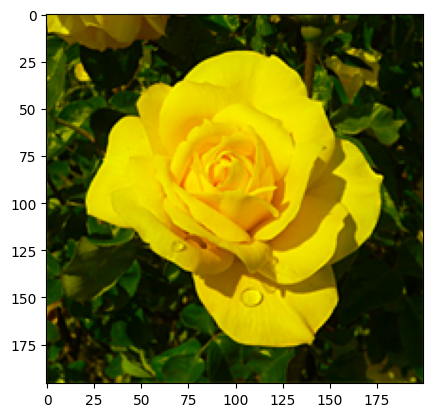

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_BGR = cv2.imread("../data/blomma.png")

flower = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

plt.imshow(flower)


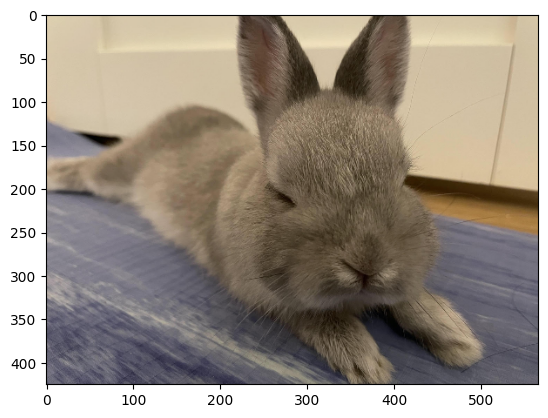

In [16]:
img_BGR = cv2.imread("../data/bella.jpeg")
img = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
rabbit = cv2.resize(img, (int(img.shape[1]*0.4), int(img.shape[0]*0.4)))
plt.imshow(rabbit)

---
## Color quantization 
Reduce number of colors in an image by replacing with cluster center. These cluster centers can be computed with k-means algorithm.

- useful for simple color segmentation 
- useful when a display only can show a small number of colors
- can be used for compression 

First we flatten the each of the 3 matrices (R, G, B) to one dimensional vector for each color channel resulting in:

| R   | G   | B   |
| --- | --- | --- |
| R1  | G1  | B1  |
| R2  | G2  | B2  |
| ... | ... | ... |
| RN  | GN  | BN  |

Using k-means with $k$ as the number of colors, we find the cluster centers and give that color to every point in that cluster. Finally reshape it back to original shape.

[[0.86994822 0.75834621 0.        ]
 [0.86994822 0.75834621 0.        ]
 [0.86994822 0.75834621 0.        ]
 ...
 [0.12622202 0.16462316 0.        ]
 [0.12622202 0.16462316 0.        ]
 [0.12622202 0.16462316 0.        ]]


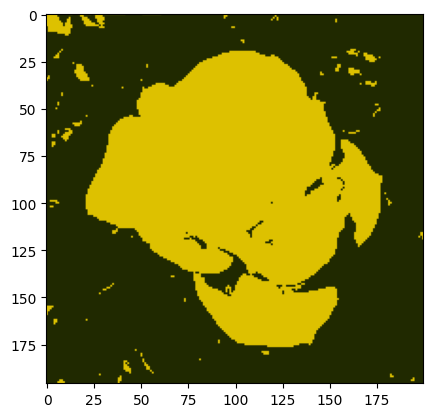

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

X = flower.reshape(-1,3)

scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)

kmean = KMeans(2)
kmean.fit(scaled_X)

#print("Centers: ",kmean.cluster_centers_ )
#print("Labels: ",kmean.labels_ )

quantized_color_space = kmean.cluster_centers_[kmean.labels_]
print(quantized_color_space)
quantized = quantized_color_space.reshape(flower.shape)
plt.imshow(quantized)

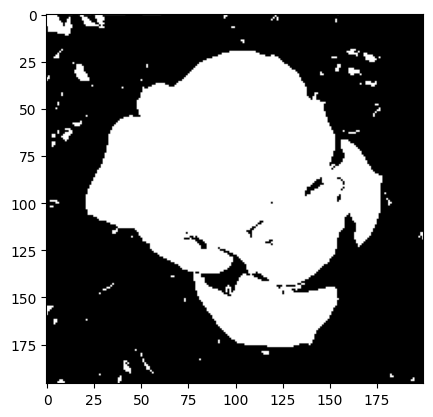

In [27]:
mask = (quantized[:, :, 1] > .75)
plt.imshow(mask, cmap="gray")

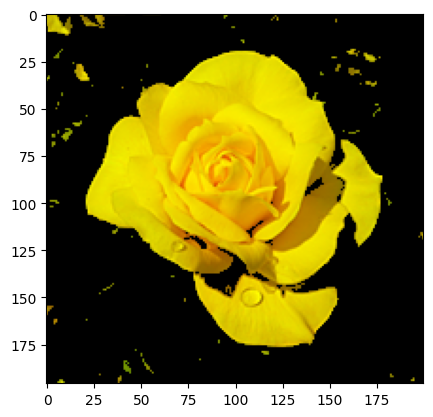

In [28]:
segmented_flower = (mask[:,:,None]*flower)
plt.imshow(segmented_flower)


---
## Reduce colors

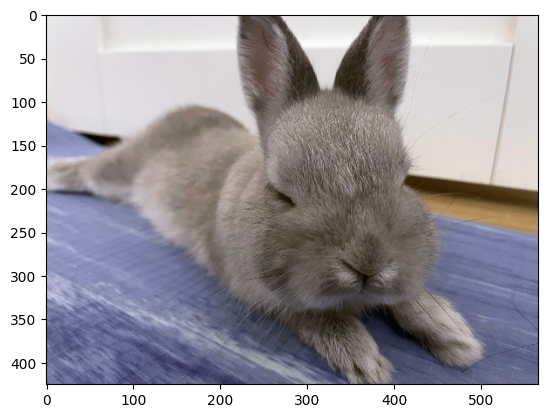

In [35]:
X = rabbit.reshape(-1, 3)
scaled_X = scaler.fit_transform(X)

kmean = KMeans(1024)
kmean.fit(scaled_X)
quantized_color_space = kmean.cluster_centers_[kmean.labels_]
quantized = quantized_color_space.reshape(rabbit.shape)
plt.imshow(quantized)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
